In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import datetime as dt

In [2]:
import weatherfeed as wf

# Comparaison $T_{ext}$ mesurée et celle de la météo

In [22]:
coords_grenoble = (45.1973288, 5.7139923) #(45.1973288, 5.7103223)

startday, lastday = pd.to_datetime('22/06/2017', format='%d/%m/%Y'), pd.to_datetime('now')

In [23]:
# download the data:
data = wf.buildmultidayDF(startday, lastday, coords_grenoble )

22, 23, 24, 25, 26, 27, 28, 29, 30, 1, done


In [24]:
import emoncmsfeed as getfeeds

In [25]:
dataframefreq = '10min'
feeds =  {  'T_ext':2  } # 'T_int':3 ,

In [26]:
df = getfeeds.builddataframe( feeds, dataframefreq ) # startdate=pd.to_datetime('22/06/2017') 

In [27]:
df['Tmeteo'] = data['temperature']
df = df.interpolate()

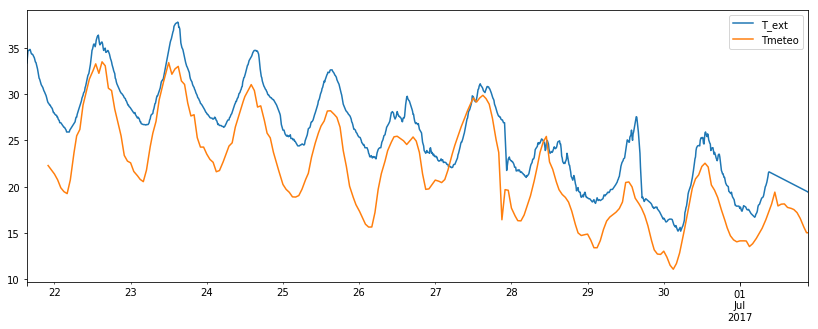

In [28]:
df.plot( figsize=(14, 5) ); # plt.ylim([10, 30])

# Comparaison avec une autre position GPS

In [45]:
coords_bis = (45.1673058,5.7514976)

# download the data:
data_bis = wf.buildmultidayDF(startday, lastday, coords_bis )

In [46]:
data_coors = pd.concat( (data['temperature'], data_bis['temperature']) , axis=1  )

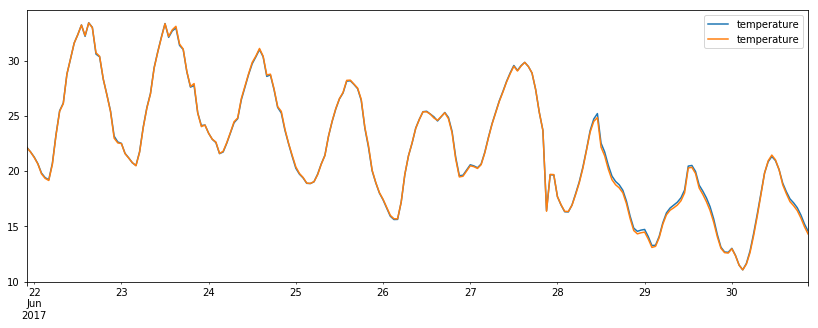

In [47]:
data_coors.plot(figsize=(14, 5))

## Data from ROMMA

http://romma.fr/station_24.php?id=4&tempe=1

http://romma.fr/frame_station24.php?&id_station=4&tempe=1&humi=&pluie=&vent=&pressure=&rayonnement=

     /javascript/ copy()

In [11]:
import json

In [12]:
with open('data/romma_temp.json') as data_file:    
    data_romma = json.load(data_file)

In [13]:
dateindex = pd.to_datetime(data_romma[0], unit='ms')

In [14]:
df_romma = pd.DataFrame( {'T_romma':data_romma[1]}, index=dateindex )#,  parse_dates=True )

In [19]:
# Zoom
zoom_start = pd.to_datetime( '22/06/2017' ) 
mask = (df_romma.index > zoom_start)

In [20]:
df['T_romma'] = df_romma.loc[mask]
df = df.interpolate()

(10, 40)

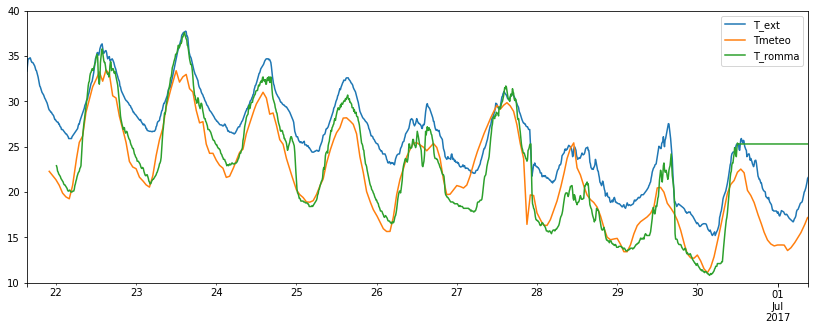

In [21]:
df.plot( figsize=(14, 5) ); plt.ylim([10, 40])

 laquelle est correcte ??  
 à priori Romma

In [105]:
delta = df['T_romma'] - df['T_ext']

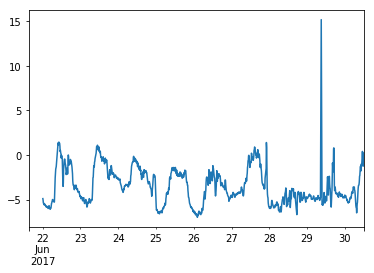

In [106]:
dd.plot()